# Лабораторная работа  6

Линейная Регрессия в sklearn

Выполнил: номер группы, фио (добавить в имя файла)

Ссылки на теорию: 
- https://habr.com/ru/company/ods/blog/323890/
- https://habr.com/ru/post/278513/
- https://habr.com/ru/post/279117/

0 Найти и загрузить датасет, подходящий для задачи регрессии. Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [47]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
import warnings

In [49]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [50]:
data = load_penguins()
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [51]:
# print unique values of categorical columns
for col in ['species', 'island', 'sex', 'year']:
  print(f'{col} = {data[col].unique()}')

species = ['Adelie' 'Gentoo' 'Chinstrap']
island = ['Torgersen' 'Biscoe' 'Dream']
sex = ['male' 'female' nan]
year = [2007 2008 2009]


In [52]:
# вещественные колонки:
# - bill_length_mm        длина клюва пингвина в мм
# - bill_depth_mm         высота клюва пингвина в мм
# - flipper_length_mm     длина плавника пингвина в мм
# - body_mass_g           масса тела пингвина в граммах

# целочисленные колонки:
# - year                  год проведения исследования: 2007, 2008 и 2009

# категориальные колонки:
# - species               биологический вид пингвина: пингвин Адели, cубантарктический пингвин и антарктический пингвин
# - island                остров, на котором пингвин был исследован: Торгерсен, Биско и Дрим
# - sex                   пол пингвина: муж, жен и неопределённый

1 Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [53]:
# delete rows with nan
data.dropna(inplace=True)

float_data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

2 Визуализировать heatmap-матрицу кореллированности признаков. См. [пример.](https://stackoverflow.com/questions/39409866/correlation-heatmap)

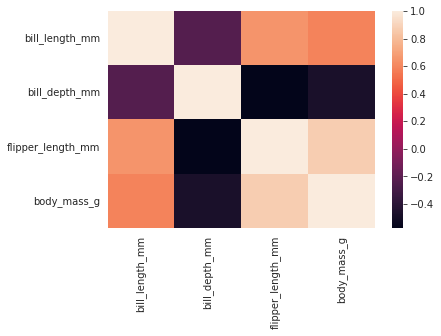

In [54]:
corr = float_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

3 Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. [пример.](https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h)


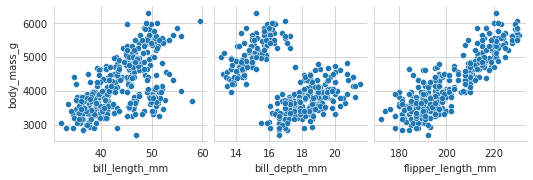

In [55]:
y = float_data['body_mass_g']
X = float_data.drop('body_mass_g', axis=1)
sns.pairplot(data = float_data, y_vars = ['body_mass_g'], x_vars = X.columns, height=2.5)
plt.show()

4  Разделить набор данных на обучающую и тестовую выборки

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

**5 Линейная регрессия**

5.1 Обучить модель линейной регрессии (`LinearRegression`)



In [57]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе



In [58]:
print('MAE:', str(mean_absolute_error(y_train, model_lr.predict(X_train))))
print('MSE:', str(mean_squared_error(y_train, model_lr.predict(X_train))))
print('R2:', str(r2_score(y_train, model_lr.predict(X_train))))

MAE: 321.9336824569166
MSE: 162534.2622424887
R2: 0.7437826836259327


In [59]:
print('MAE:', str(mean_absolute_error(y_test, model_lr.predict(X_test))))
print('MSE:', str(mean_squared_error(y_test, model_lr.predict(X_test))))
print('R2:', str(r2_score(y_test, model_lr.predict(X_test))))

MAE: 279.63349234839524
MSE: 125769.71035503314
R2: 0.8129300756013307


5.3 Вывести `model.coef_` и `model.intercept_`



In [60]:
model_lr.coef_

array([ 4.29788783,  1.95342026, 49.50269959])

In [61]:
model_lr.intercept_

-5969.519605053988

5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси. 

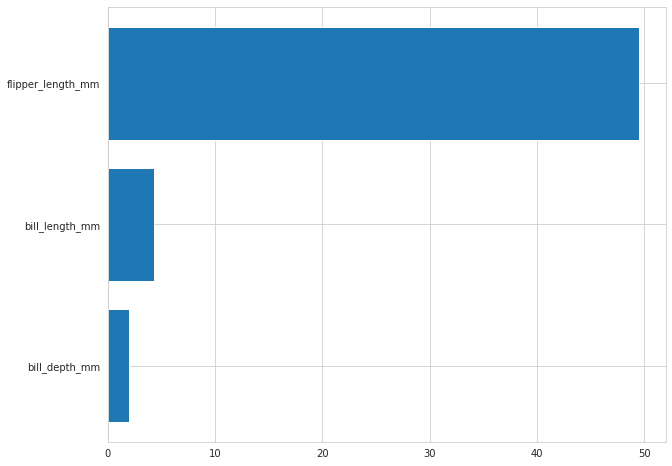

In [62]:
coefs = []
names = []
coefs_names = zip(model_lr.coef_, X.columns)
coefs_names = sorted(coefs_names, key=lambda x: x[0])

for c, n in coefs_names:
    coefs.append(c)
    names.append(n)
    
plt.figure(figsize=(10,8))
plt.barh(range(len(model_lr.coef_)), coefs, align='center')
plt.yticks(range(len(model_lr.coef_)), names)
plt.show()

**6 Модель `Lasso`**

6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью





In [63]:
lasso = Lasso()

parameters = {'alpha': np.linspace(0,1,100)}
lasso_grid = GridSearchCV(lasso,parameters)
lasso_grid.fit(X_train, y_train)

print('best parameters:', lasso_grid.best_params_)
lasso = lasso_grid.best_estimator_

best parameters: {'alpha': 1.0}


6.1 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе



In [64]:
print('MAE:', str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('MSE:', str(mean_squared_error(y_train, lasso.predict(X_train))))
print('R2:', str(r2_score(y_train, lasso.predict(X_train))))

MAE: 321.9717889942823
MSE: 162534.73206426186
R2: 0.743781943003788


In [65]:
print('MAE:', str(mean_absolute_error(y_test, lasso.predict(X_test))))
print('MSE:', str(mean_squared_error(y_test, lasso.predict(X_test))))
print('R2:', str(r2_score(y_test, lasso.predict(X_test))))

MAE: 279.75785434322074
MSE: 125897.38735118818
R2: 0.8127401687791653


6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`



In [66]:
lasso.coef_

array([ 4.29416841,  1.533084  , 49.46229014])

In [67]:
lasso.intercept_

-5954.0017348674455

6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

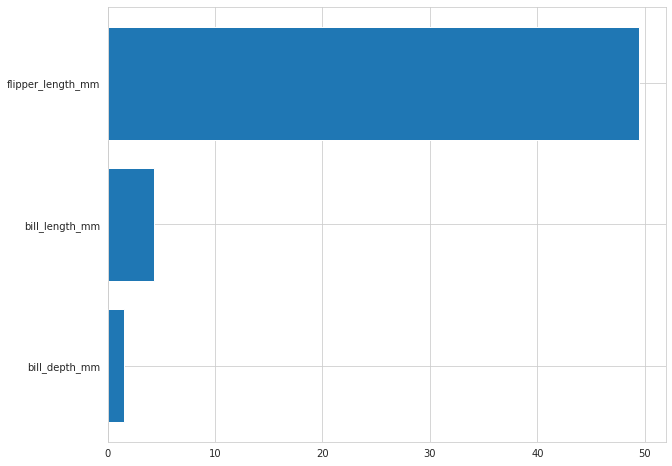

In [68]:
coefs_2 = []
names_2 = []
coefs_names = zip(lasso.coef_, X.columns)
coefs_names = sorted(coefs_names, key=lambda x: x[0])

for c, n in coefs_names:
    coefs_2.append(c)
    names_2.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(lasso.coef_)), coefs_2, align='center')
plt.yticks(range(len(lasso.coef_)), names_2)
plt.show()

**7 Модель Ridge**

7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью



In [69]:
ridge = Ridge()

parameters = {'alpha': np.linspace(0,1,100)}
ridge_grid = GridSearchCV(ridge,parameters)
ridge_grid.fit(X_train, y_train)

print('best parameters:', ridge_grid.best_params_)
ridge = ridge_grid.best_estimator_

best parameters: {'alpha': 1.0}


7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе



In [70]:
print('MAE:', str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('MSE:', str(mean_squared_error(y_train, ridge.predict(X_train))))
print('R2:', str(r2_score(y_train, ridge.predict(X_train))))

MAE: 321.9350648677271
MSE: 162534.26285166907
R2: 0.7437826826656271


In [71]:
print('MAE:', str(mean_absolute_error(y_test, ridge.predict(X_test))))
print('MSE:', str(mean_squared_error(y_test, ridge.predict(X_test))))
print('R2:', str(r2_score(y_test, ridge.predict(X_test))))

MAE: 279.6366944521137
MSE: 125772.54876493261
R2: 0.8129258537491549


7.3 Для лучшей модели вывести model.coef_ и model.intercept_



In [72]:
ridge.coef_

array([ 4.30113956,  1.94192829, 49.49980351])

In [73]:
ridge.intercept_

-5968.882735277221

7.4  Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

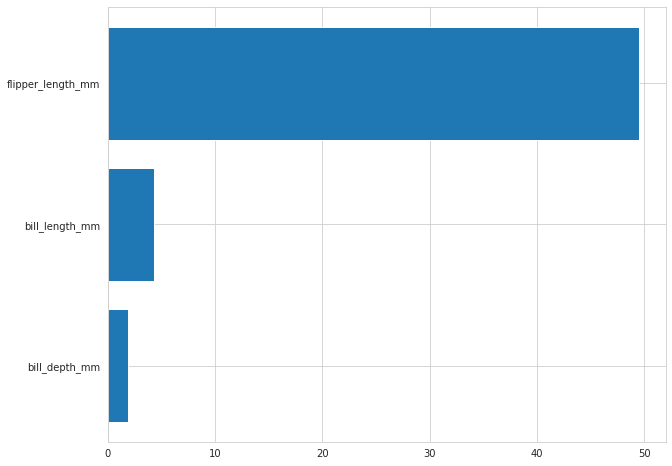

In [74]:
coefs_3 = []
names_3 = []
coefs_names = zip(ridge.coef_, X.columns)
coefs_names = sorted(coefs_names, key=lambda x: x[0])

for c, n in coefs_names:
    coefs_3.append(c)
    names_3.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(ridge.coef_)), coefs_3, align='center')
plt.yticks(range(len(ridge.coef_)), names_3)
plt.show()

**8 Модель `ElasticNet`**

8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью



In [75]:
elnet = ElasticNet()

parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid = GridSearchCV(elnet,parameters)
elnet_grid.fit(X_train, y_train)

print('best parameters:', elnet_grid.best_params_)
elnet = elnet_grid.best_estimator_

best parameters: {'alpha': 1.0, 'l1_ratio': 0.0}


8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе



In [76]:
print('MAE:', str(mean_absolute_error(y_train, elnet.predict(X_train))))
print('MSE:', str(mean_squared_error(y_train, elnet.predict(X_train))))
print('R2:', str(r2_score(y_train, elnet.predict(X_train))))

MAE: 322.1747319860208
MSE: 162560.5888287031
R2: 0.7437411826699122


In [77]:
print("MAE: " + str(mean_absolute_error(y_test, elnet.predict(X_test))))
print("MSE: " + str(mean_squared_error(y_test, elnet.predict(X_test))))
print("R2: " + str(r2_score(y_test, elnet.predict(X_test))))

MAE: 280.3036001129918
MSE: 126254.61891879413
R2: 0.8122088223829924


8.3 Для лучшей модели вывести model.coef_ и model.intercept_



In [78]:
elnet.coef_

array([ 4.97151191e+00, -4.30895425e-02,  4.88940044e+01])

In [79]:
elnet.intercept_

-5842.407502108989

8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

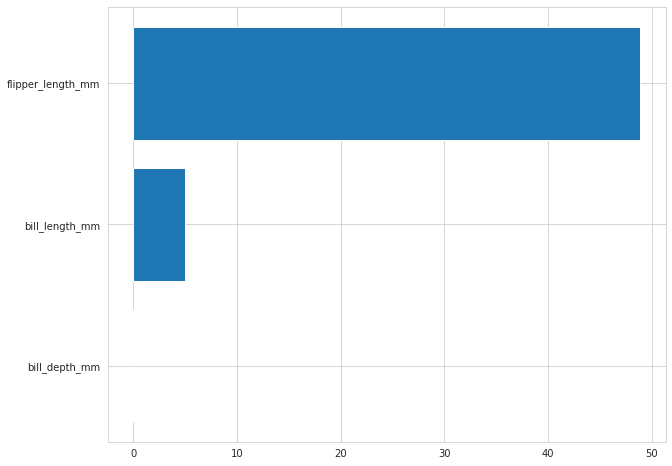

In [80]:
coefs_4 = []
names_4 = []
coefs_names = zip(elnet.coef_, X.columns)
coefs_names = sorted(coefs_names, key=lambda x: x[0])

for c, n in coefs_names:
    coefs_4.append(c)
    names_4.append(n)

plt.figure(figsize=(10,8))
plt.barh(range(len(elnet.coef_)), coefs_4, align='center')
plt.yticks(range(len(elnet.coef_)), names_4)
plt.show()

 9 Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

In [81]:
print('MAE LR:', str(mean_absolute_error(y_test, model_lr.predict(X_test))))
print('MAE lasso:', str(mean_absolute_error(y_test, lasso.predict(X_test))))
print('MAE ridge:', str(mean_absolute_error(y_test, ridge.predict(X_test))))
print('MAE elastic net:', str(mean_absolute_error(y_test, elnet.predict(X_test))))

MAE LR: 279.63349234839524
MAE lasso: 279.75785434322074
MAE ridge: 279.6366944521137
MAE elastic net: 280.3036001129918


10  Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через `pd.get_dummies( ..., drop_first = True )`. Обучаем лучшую модель.

In [82]:
binary_data = data.drop(columns=['island', 'year', 'sex'])
binary_data = pd.concat([binary_data,pd.get_dummies(data['island'],drop_first = True)],axis = 1)
binary_data = pd.concat([binary_data,pd.get_dummies(data['year'],drop_first = True)],axis = 1)
binary_data = pd.concat([binary_data,pd.get_dummies(data['sex'],drop_first = True)],axis = 1)
binary_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,2008,2009,male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0,0,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,1,0,0,1,1
340,Chinstrap,43.5,18.1,202.0,3400.0,1,0,0,1,0
341,Chinstrap,49.6,18.2,193.0,3775.0,1,0,0,1,1
342,Chinstrap,50.8,19.0,210.0,4100.0,1,0,0,1,1


In [83]:
binary_data['species'] = pd.factorize(data['species'])[0]
binary_data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,2008,2009,male
0,0,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,0,39.5,17.4,186.0,3800.0,0,1,0,0,0
2,0,40.3,18.0,195.0,3250.0,0,1,0,0,0
4,0,36.7,19.3,193.0,3450.0,0,1,0,0,0
5,0,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,2,55.8,19.8,207.0,4000.0,1,0,0,1,1
340,2,43.5,18.1,202.0,3400.0,1,0,0,1,0
341,2,49.6,18.2,193.0,3775.0,1,0,0,1,1
342,2,50.8,19.0,210.0,4100.0,1,0,0,1,1


11 Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [84]:
y1 = binary_data['species']
X1 = binary_data.drop('species', axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

elnet1 = ElasticNet()
parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid1 = GridSearchCV(elnet1,parameters)
elnet_grid1.fit(X_train1, y_train1)

print('best parameters:', elnet_grid1.best_params_)
elnet1 = elnet_grid1.best_estimator_

best parameters: {'alpha': 0.010101010101010102, 'l1_ratio': 0.7171717171717172}


In [85]:
print('MAE:', str(mean_absolute_error(y_test1, elnet1.predict(X_test1))))
print('MSE:', str(mean_squared_error(y_test1, elnet1.predict(X_test1))))
print('R2:', str(r2_score(y_test1, elnet1.predict(X_test1))))

MAE: 0.2738919374926801
MSE: 0.1183416840172843
R2: 0.7942796446351421


12 Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы. 

In [86]:
scaler = StandardScaler()

data_tr = binary_data.drop('species',axis = 1)
target = binary_data['species']
scaler.fit(data_tr)
tdtr = scaler.transform(data_tr)

X_train2, X_test2, y_train2, y_test2 = train_test_split(tdtr, target, random_state = 0)

elnet2 = ElasticNet()
parameters = {'alpha': np.linspace(0,1,100),
                 'l1_ratio': np.linspace(0,1,100)}
elnet_grid2 = GridSearchCV(elnet2,parameters)
elnet_grid2.fit(X_train2, y_train2)

elnet_grid2.best_params_
elnet2 = elnet_grid2.best_estimator_

In [87]:
print('MAE:', str(mean_absolute_error(y_test2, elnet2.predict(X_test2))))
print('MSE:', str(mean_squared_error(y_test2, elnet2.predict(X_test2))))
print('R2:', str(r2_score(y_test2, elnet2.predict(X_test2))))

MAE: 0.2731573104978722
MSE: 0.11546887604130449
R2: 0.7992736168151159


13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

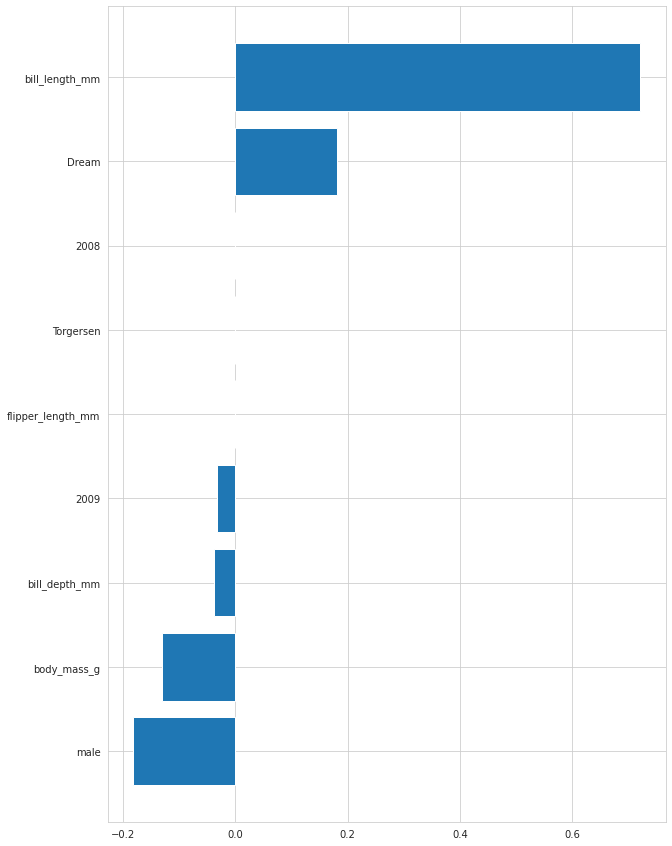

In [88]:
coefs_5 = []
names_5 = []
coefs_names = zip(elnet2.coef_, data_tr.columns)
coefs_names = sorted(coefs_names, key=lambda x: x[0])

for c, n in coefs_names:
    coefs_5.append(c)
    names_5.append(n)

plt.figure(figsize=(10,15))
plt.barh(range(len(elnet2.coef_)), coefs_5, align='center')
plt.yticks(range(len(elnet2.coef_)), names_5)
plt.show()

**Замечания:** При использовании GridSearchCV для извлечения параметров лучшей модели используем атрибут с объектом лучшей модели: gs.best_estimator_, например извлекаем вектор коэффициентов: gs.best_estimator_.coef_

Логика всего задания проста:

- Ищем лучший регрессор на вещественных признаках

- Пробуем добавить категориальные (преобразованные в бинарные), смотрим как изменилось качество, стала ли модель лучше работать

- Нормализуем признаки через StandardScaler, смотрим, повлияло ли это на качество модели.

In [89]:
print('MAE LR:', str(mean_absolute_error(y_test, model_lr.predict(X_test))))
print('MAE lasso:', str(mean_absolute_error(y_test, lasso.predict(X_test))))
print('MAE ridge:', str(mean_absolute_error(y_test, ridge.predict(X_test))))
print('MAE elastic net:', str(mean_absolute_error(y_test, elnet.predict(X_test))))
print('MAE elastic net with all features:', str(mean_absolute_error(y_test2, elnet1.predict(X_test1))))
print('MAE elastic net with normalize:', str(mean_absolute_error(y_test2, elnet2.predict(X_test2))))

MAE LR: 279.63349234839524
MAE lasso: 279.75785434322074
MAE ridge: 279.6366944521137
MAE elastic net: 280.3036001129918
MAE elastic net with all features: 0.2738919374926801
MAE elastic net with normalize: 0.2731573104978722


In [90]:
'''
Таким образом, можно сделать вывод, что наилучшим регрессором оказался Elastic Net с нормализацией признаков.
'''

'\nТаким образом, можно сделать вывод, что наилучшим регрессором оказался Elastic Net с нормализацией признаков.\n'